#### Goal of this script is to:
####  1| import and plot data in digestable ways
####  2| make new anova df for each participant 
####  3| fix supersaturation(?) - depends on how visual looks

In [1]:
# load packages
import numpy as np 
from scipy.io   import  loadmat
import pandas as pd
import os
import matplotlib.pyplot as plt #import matplotlib as plt
from scipy.optimize import curve_fit 
import seaborn as sns #import mat73
import pickle as pkl
from datetime import datetime

In [2]:
NumBins = 6 # number of contrasts
NumHarms = 2 # number of harmonic data: 2F1, 4F1
NumComp = 0 # first component from RCA
NumConds = 4

In [6]:
# Main Directory of processed file from MatLab
# MainDir = 'D:\\AttnXV3_analysis\\RCA_F1\\AvgCRFs\\' # set dir
MainDir = 'C:\\plimon\\LTP_analysis\\RCA_F1\\CleanCRFDiff\\' # set dir
os.chdir(MainDir) # change old dir, to this dir
d = os.listdir(MainDir) # list files in dir
print(f'Files on hand: {d}')
##############################################
FileN = d[0] # choose one                        
file_path1 = os.path.join(MainDir, FileN) # join paths and prep 2 load
print('Current WD:',file_path1) # does path exist ... ?
print('Does File #1 Exist?',os.path.exists(file_path1)) # yes or no

Files on hand: ['AllClean_CRF_Diffs_20240312_1131.pkl']
Current WD: C:\plimon\LTP_analysis\RCA_F1\CleanCRFDiff\AllClean_CRF_Diffs_20240312_1131.pkl
Does File #1 Exist? True


In [7]:
loadData = pkl.load(open(file_path1,'rb'))
print(loadData.keys())

diff_data = loadData['Data']
acrf = loadData['Avg']
eb = loadData['ErrorBars']
data_labels = loadData['DictMainKeys'] # condition labels for data + data_1s dict keys
contrast_levels = loadData['ContLevs'] # array for contrast labels (indexing)
contrast_labs = loadData['crfLabs'] # list for contrast labels (plotting)
note = loadData['VoiceMemo'] # personal note
print(note)

dict_keys(['Data', 'Avg', 'ErrorBars', 'VoiceMemo', 'DictMainKeys', 'ContLevs', 'crfLabs'])


In [10]:
cp1 = sns.color_palette("husl", 8) # color pallete 1 
cp2 = sns.color_palette("hls", 8)  # color pallete 2
sns.set_theme() # set global plot theme
x_lev = np.arange(0,NumBins,1) # x ticks for plotting 

In [23]:
test = diff_data[0]
avg = acrf[0]
[x,y] = test.shape

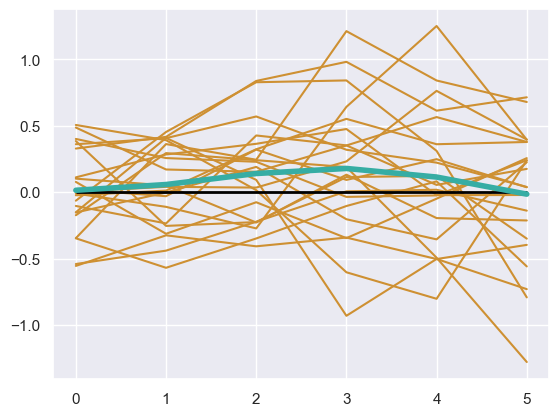

In [38]:
for s in range(x):
    plt.plot(test[s,0:6], color = cp1[1])
plt.hlines(0,xmax = 0, xmin = 5, color = 'black', linewidth = 2)
plt.plot(avg[0:6], color = cp1[4], linewidth = 4)